In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/custom-novartis-oncology-hackathon-2020/all_data_new.txt
/kaggle/input/custom-novartis-oncology-hackathon-2020/problem_2_grouped_data.txt
/kaggle/input/custom-novartis-oncology-hackathon-2020/PX.txt
/kaggle/input/custom-novartis-oncology-hackathon-2020/RX.txt
/kaggle/input/custom-novartis-oncology-hackathon-2020/DIAGNOSIS_reference_20200925.txt
/kaggle/input/custom-novartis-oncology-hackathon-2020/merged_px_rx_outer.txt
/kaggle/input/custom-novartis-oncology-hackathon-2020/DIAG.txt
/kaggle/input/custom-novartis-oncology-hackathon-2020/all_data_proc_abbr.txt
/kaggle/input/custom-novartis-oncology-hackathon-2020/RX_2l.txt
/kaggle/input/custom-novartis-oncology-hackathon-2020/BC_SN ICD Code.xlsx
/kaggle/input/custom-novartis-oncology-hackathon-2020/PRODUCT_reference_20200925.txt
/kaggle/input/custom-novartis-oncology-hackathon-2020/all_data_grouped2.txt
/kaggle/input/custom-novartis-oncology-hackathon-2020/PX_2l.txt
/kaggle/input/custom-novartis-oncology-hackathon-2020/probl

In [2]:
%matplotlib inline

In [3]:
train = pd.read_csv("/kaggle/input/custom-novartis-oncology-hackathon-2020/problem_1_grouped_data.txt", compression='gzip', sep='|')

In [4]:
# train2 = pd.read_csv("/kaggle/input/custom-novartis-oncology-hackathon-2020/all_data_grouped2.txt",compression='gzip',sep='|')

In [5]:
train.head()

,PATIENT_ID,PROVIDER_BILLING_ID,PROVIDER_FACILITY_ID,PROVIDER_REFERRING_ID,PROVIDER_RENDERING_ID,PAYER_PLAN_ID,PROVIDER_ID,BOOL_FLEXIBLE_FLD,WEEK_ID,BOOL_PROC_MOD,...,BRAND_VER,BRAND_nan,DRUG_CLASS_AI,DRUG_CLASS_AM,DRUG_CLASS_KI,DRUG_CLASS_OTHERS,DRUG_CLASS_SERD,DRUG_CLASS_SERM,DRUG_CLASS_nan,MBC_PATIENT
0,29388541,2,2,4,7,2,6,592,65,73,...,0,594.0,11,0,0,10.0,0,0,594.0,0
1,29406345,6,1,5,17,5,2,101,46,26,...,0,106.0,14,0,0,1.0,0,0,106.0,0
2,29437465,2,1,2,2,2,1,19,2,19,...,0,19.0,0,0,0,1.0,0,0,19.0,1
3,29457775,5,2,6,9,2,1,96,24,16,...,0,96.0,0,0,0,1.0,0,0,96.0,0
4,29460978,2,1,2,4,7,3,13,13,1,...,0,13.0,6,0,0,2.0,0,0,13.0,0


In [6]:
train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 119 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   PATIENT_ID                                                                               20000 non-null  int64  
 1   PROVIDER_BILLING_ID                                                                      20000 non-null  int64  
 2   PROVIDER_FACILITY_ID                                                                     20000 non-null  int64  
 3   PROVIDER_REFERRING_ID                                                                    20000 non-null  int64  
 4   PROVIDER_RENDERING_ID                                                                    20000 non-null  int64  
 5   PAYER_PLAN_ID                                              

In [7]:
train.describe()

,PATIENT_ID,PROVIDER_BILLING_ID,PROVIDER_FACILITY_ID,PROVIDER_REFERRING_ID,PROVIDER_RENDERING_ID,PAYER_PLAN_ID,PROVIDER_ID,BOOL_FLEXIBLE_FLD,WEEK_ID,BOOL_PROC_MOD,...,BRAND_VER,BRAND_nan,DRUG_CLASS_AI,DRUG_CLASS_AM,DRUG_CLASS_KI,DRUG_CLASS_OTHERS,DRUG_CLASS_SERD,DRUG_CLASS_SERM,DRUG_CLASS_nan,MBC_PATIENT
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,7.823142e+08,4.771900,1.192800,4.721350,9.020300,3.72185,1.925900,153.861150,28.304100,30.677700,...,0.002050,142.675050,4.463400,0.072800,0.076750,21.672150,0.143500,1.383200,142.675050,0.431050
std,4.925343e+08,3.080494,0.487381,2.994604,6.937852,2.32027,2.194345,245.977744,27.398353,83.492348,...,0.097705,225.248741,9.670348,1.098162,1.069587,62.640404,2.818316,5.833949,225.248741,0.495235
min,2.938854e+07,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.438085e+08,3.000000,1.000000,3.000000,4.000000,2.00000,0.000000,24.000000,8.000000,4.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000
50%,7.122249e+08,4.000000,1.000000,4.000000,7.000000,3.00000,1.000000,70.000000,22.000000,13.000000,...,0.000000,71.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,71.000000,0.000000
75%,1.177320e+09,6.000000,1.000000,6.000000,12.000000,5.00000,3.000000,175.000000,40.000000,32.000000,...,0.000000,166.000000,4.000000,0.000000,0.000000,11.000000,0.000000,0.000000,166.000000,1.000000
max,1.734678e+09,38.000000,6.000000,59.000000,130.000000,34.00000,38.000000,6573.000000,325.000000,3011.000000,...,8.000000,6581.000000,89.000000,62.000000,51.000000,2109.000000,136.000000,83.000000,6581.000000,1.000000


In [8]:
target='MBC_PATIENT'
indexes = ['PATIENT_ID']
categorical_columns = ['BOOL_FLEXIBLE_FLD', 'BOOL_PROC_MOD']
numeric_columns = list(train.columns)
numeric_columns.remove('PATIENT_ID')
numeric_columns.remove(target)
numeric_columns.remove(categorical_columns[0])
numeric_columns.remove(categorical_columns[1])

In [9]:
all_cols = numeric_columns + categorical_columns

In [10]:
def convert_type(df):
    for column in categorical_columns:
        df[column] = df[column].astype('category')
        
#     for col in date_columns: 
#         df[col] = pd.to_datetime(df[col]) 
#         df[col] = df[col].apply(pd.datetime.toordinal)

In [11]:
convert_type(train)

In [12]:
# train_rows_all = set(train[indexes])

In [13]:
train.drop(target,axis=1).shape

(20000, 118)

In [14]:
train.shape

(20000, 119)

In [15]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# for i in categorical_columns:
#     df_total[i]=le.fit_transform(df_total[i])

# le = LabelEncoder()
# for i in boolean_columns:
#     df_total[i] = le.fit_transform(df_total[i])

## Binary categories

In [16]:
# import category_encoders as ce

# ce_bin=ce.BinaryEncoder(cols=categorical_columns)
# df_total_binary = ce_bin.fit_transform(df_total)

## Split Train and test

In [17]:
X= train[all_cols]
y= train[[target]]

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
print(train[train[target] == 1].shape)
print(train[train[target] == 0].shape)

(8621, 119)
(11379, 119)


In [20]:
print(y_train[y_train[target] == 1].shape)
print(y_train[y_train[target] == 0].shape)

(6478, 1)
(8522, 1)


In [21]:
temp_train = pd.concat([X_train,y_train],axis=1)

In [22]:
print(temp_train[temp_train[target] == 1].shape)
print(temp_train[temp_train[target] == 0].shape)

(6478, 118)
(8522, 118)


In [23]:
temp_train.shape

(15000, 118)

## Down Sampling

In [24]:
from sklearn.utils import resample

#separating majority and minority classes
df_majority = temp_train[temp_train[target] == 0]
df_minority = temp_train[temp_train[target] == 1]

df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=6478,
                                   random_state=42)

df_downsampled = pd.concat([df_minority,df_majority_downsampled],axis=0)

#splitting dependent and independent variables

df_downsampled_X = df_downsampled[all_cols]
df_downsampled_Y = df_downsampled[[target]]

print(df_downsampled_X.shape)
print(df_downsampled_Y.shape)

(12956, 117)
(12956, 1)


In [25]:
df_downsampled.head()

,PROVIDER_BILLING_ID,PROVIDER_FACILITY_ID,PROVIDER_REFERRING_ID,PROVIDER_RENDERING_ID,PAYER_PLAN_ID,PROVIDER_ID,WEEK_ID,ABBR_PROCEDURE_DOM_CPT_I_AN,ABBR_PROCEDURE_DOM_CPT_I_DIS,ABBR_PROCEDURE_DOM_CPT_I_EN,...,DRUG_CLASS_AI,DRUG_CLASS_AM,DRUG_CLASS_KI,DRUG_CLASS_OTHERS,DRUG_CLASS_SERD,DRUG_CLASS_SERM,DRUG_CLASS_nan,BOOL_FLEXIBLE_FLD,BOOL_PROC_MOD,MBC_PATIENT
5514,4,1,3,8,6,1,18,20.0,0,0,...,3,0,0,3.0,0,0,57.0,60,13,1
12574,6,1,6,24,4,2,56,26.0,3,2,...,0,0,0,44.0,0,0,143.0,150,19,1
15733,2,1,2,2,3,1,16,4.0,0,0,...,15,0,0,0.0,0,0,22.0,22,0,1
11811,4,1,5,6,4,2,14,2.0,0,0,...,0,0,0,0.0,0,11,14.0,14,11,1
7752,8,1,15,21,7,4,74,34.0,0,0,...,5,0,0,5.0,0,41,207.0,209,80,1


## Up Sampling

In [26]:
from sklearn.utils import resample

#separating majority and minority classes
df_majority = temp_train[temp_train[target] == 0]
df_minority = temp_train[temp_train[target] == 1]

df_minority_upsampled = resample(df_minority,
                                   replace=True,
                                   n_samples=8522,
                                   random_state=42)

df_upsampled = pd.concat([df_majority,df_minority_upsampled],axis=0)

#splitting dependent and independent variables

df_upsampled_X = df_upsampled[all_cols]
df_upsampled_Y = df_upsampled[[target]]

print(df_upsampled_X.shape)
print(df_upsampled_Y.shape)

(17044, 117)
(17044, 1)


In [27]:
df_upsampled.head(2)

,PROVIDER_BILLING_ID,PROVIDER_FACILITY_ID,PROVIDER_REFERRING_ID,PROVIDER_RENDERING_ID,PAYER_PLAN_ID,PROVIDER_ID,WEEK_ID,ABBR_PROCEDURE_DOM_CPT_I_AN,ABBR_PROCEDURE_DOM_CPT_I_DIS,ABBR_PROCEDURE_DOM_CPT_I_EN,...,DRUG_CLASS_AI,DRUG_CLASS_AM,DRUG_CLASS_KI,DRUG_CLASS_OTHERS,DRUG_CLASS_SERD,DRUG_CLASS_SERM,DRUG_CLASS_nan,BOOL_FLEXIBLE_FLD,BOOL_PROC_MOD,MBC_PATIENT
1266,7,1,7,18,6,2,51,247.0,0,1,...,0,0,0,627.0,0,0,830.0,1451,870,0
5864,9,1,9,19,3,2,69,42.0,1,1,...,29,0,0,22.0,0,0,100.0,121,46,0


In [28]:
from sklearn.model_selection import train_test_split

X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(df_upsampled_X, df_upsampled_Y, test_size=0.25, random_state=42)
X_train_down, X_test_down, y_train_down, y_test_down = train_test_split(df_downsampled_X, df_downsampled_Y, test_size=0.25, random_state=42)

In [29]:
features_train_up=np.array(df_upsampled_X[all_cols])
target_train_up=np.array(df_upsampled_Y[target])

features_train_down=np.array(df_downsampled_X[all_cols])
target_train_down=np.array(df_downsampled_Y[target])
# actual_test=np.array(test[numeric_columns])

## feature Scaling

In [30]:
features_train_up[0]

array([7, 1, 7, 18, 6, 2, 51, 247.0, 0, 1, 7, 0, 150.0, 164.0, 62.0, 0,
       0.0, 14.0, 0, 5, 0, 2, 28.0, 0, 582.0, 0, 1, 0, 0, 30.0, 0, 0.0,
       0.0, 0, 164.0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0, 0, 0, 0.0, 0, 0, 0,
       0.0, 0, 0, 0.0, 0.0, 0, 0, 0, 0, 0, 0, 13, 12.0, 38.0, 3.0, 0, 0,
       0, 0, 0, 0, 0, 1391.0, 0.0, 1451.0, 6.0, 0, 1142.0, 65.0, 32.0,
       94.0, 31.0, 75.0, 12, 0, 0, 6.0, 0.0, 129.0, 40.0, 25.0, 16.0,
       325.0, 426.0, 212.0, 119.0, 158.0, 7.0, 0, 0, 0, 0, 0, 0, 627.0, 0,
       0, 830.0, 0, 0, 0, 627.0, 0, 0, 830.0, 1451, 870], dtype=object)

In [31]:
# #feature scaling
# from sklearn.preprocessing import MinMaxScaler,PowerTransformer,StandardScaler
# # scaler = MinMaxScaler()

# scaler = StandardScaler()

# features_train_up_scaled = scaler.fit_transform(features_train_up)
# features_train_down_scaled = scaler.fit_transform(features_train_down)
# # features_actual = scaler.transform(actual_test)

In [32]:
# def make_submission(prediction, sub_name):
#     my_submission = pd.DataFrame({'PATIENT_ID':X_test['PATIENT_ID'],'MBC_PATIENT':prediction})
#     my_submission.to_csv('{}.csv'.format(sub_name),index=False)
#     print('A submission file has been made')

## CatBoost

In [33]:
from catboost import CatBoostClassifier
CBC = CatBoostClassifier(learning_rate=0.15, n_estimators=500, subsample=0.70, max_depth=5, scale_pos_weight=2.5)


In [34]:
CBC.fit(X_train_up[numeric_columns],y_train_up[target])
CBC_predict_up = CBC.predict(X_test_up[numeric_columns])

0:	learn: 0.6184019	total: 79.2ms	remaining: 39.5s
1:	learn: 0.5655357	total: 95.6ms	remaining: 23.8s
2:	learn: 0.5343245	total: 112ms	remaining: 18.5s
3:	learn: 0.5088363	total: 128ms	remaining: 15.9s
4:	learn: 0.4907496	total: 145ms	remaining: 14.3s
5:	learn: 0.4788082	total: 162ms	remaining: 13.3s
6:	learn: 0.4637546	total: 179ms	remaining: 12.6s
7:	learn: 0.4544653	total: 197ms	remaining: 12.1s
8:	learn: 0.4494007	total: 213ms	remaining: 11.6s
9:	learn: 0.4449423	total: 230ms	remaining: 11.3s
10:	learn: 0.4400069	total: 247ms	remaining: 11s
11:	learn: 0.4348732	total: 264ms	remaining: 10.7s
12:	learn: 0.4320487	total: 285ms	remaining: 10.7s
13:	learn: 0.4291738	total: 304ms	remaining: 10.5s
14:	learn: 0.4264166	total: 321ms	remaining: 10.4s
15:	learn: 0.4239436	total: 338ms	remaining: 10.2s
16:	learn: 0.4214513	total: 356ms	remaining: 10.1s
17:	learn: 0.4197734	total: 374ms	remaining: 10s
18:	learn: 0.4172126	total: 392ms	remaining: 9.93s
19:	learn: 0.4160149	total: 410ms	remaining

In [35]:
CBC.fit(X_train_down[numeric_columns],y_train_down[target])
CBC_predict_down = CBC.predict(X_test_down[numeric_columns])


0:	learn: 0.6222369	total: 10.6ms	remaining: 5.29s
1:	learn: 0.5673735	total: 20.4ms	remaining: 5.07s
2:	learn: 0.5369494	total: 30.3ms	remaining: 5.01s
3:	learn: 0.5175081	total: 40.2ms	remaining: 4.99s
4:	learn: 0.4933349	total: 50.4ms	remaining: 4.99s
5:	learn: 0.4822687	total: 60.7ms	remaining: 5s
6:	learn: 0.4674134	total: 70.7ms	remaining: 4.98s
7:	learn: 0.4591568	total: 80.9ms	remaining: 4.97s
8:	learn: 0.4515922	total: 91ms	remaining: 4.97s
9:	learn: 0.4472608	total: 101ms	remaining: 4.94s
10:	learn: 0.4445098	total: 111ms	remaining: 4.91s
11:	learn: 0.4409881	total: 120ms	remaining: 4.89s
12:	learn: 0.4380148	total: 130ms	remaining: 4.86s
13:	learn: 0.4338284	total: 140ms	remaining: 4.87s
14:	learn: 0.4290791	total: 150ms	remaining: 4.87s
15:	learn: 0.4268241	total: 160ms	remaining: 4.85s
16:	learn: 0.4242970	total: 170ms	remaining: 4.84s
17:	learn: 0.4221025	total: 180ms	remaining: 4.83s
18:	learn: 0.4198326	total: 190ms	remaining: 4.8s
19:	learn: 0.4187666	total: 200ms	rema

In [36]:
CBC.fit(X_train[numeric_columns],y_train[target])
CBC_predict = CBC.predict(X_test[numeric_columns])

0:	learn: 0.6324141	total: 14.8ms	remaining: 7.36s
1:	learn: 0.5863189	total: 28.7ms	remaining: 7.15s
2:	learn: 0.5534555	total: 43.2ms	remaining: 7.16s
3:	learn: 0.5310599	total: 57.3ms	remaining: 7.11s
4:	learn: 0.5143044	total: 71.6ms	remaining: 7.08s
5:	learn: 0.4990969	total: 85.9ms	remaining: 7.07s
6:	learn: 0.4900639	total: 99.6ms	remaining: 7.01s
7:	learn: 0.4846570	total: 113ms	remaining: 6.94s
8:	learn: 0.4767337	total: 126ms	remaining: 6.9s
9:	learn: 0.4735650	total: 141ms	remaining: 6.89s
10:	learn: 0.4684089	total: 154ms	remaining: 6.86s
11:	learn: 0.4653010	total: 168ms	remaining: 6.83s
12:	learn: 0.4612421	total: 183ms	remaining: 6.84s
13:	learn: 0.4584115	total: 197ms	remaining: 6.82s
14:	learn: 0.4546695	total: 211ms	remaining: 6.82s
15:	learn: 0.4518417	total: 228ms	remaining: 6.9s
16:	learn: 0.4488560	total: 241ms	remaining: 6.84s
17:	learn: 0.4477186	total: 254ms	remaining: 6.8s
18:	learn: 0.4456032	total: 266ms	remaining: 6.74s
19:	learn: 0.4443226	total: 280ms	rem

In [37]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

In [38]:
from sklearn.metrics import confusion_matrix
CBC_CM = confusion_matrix(y_test_down, CBC_predict_down)
print("Accuracy:",accuracy_score(CBC_predict_down,y_test_down))
print("Precision:",precision_score(CBC_predict_down,y_test_down))
print("Recall/Sevsitivity:",recall_score(CBC_predict_down,y_test_down))
CBC_specificity = CBC_CM[0][0]/(CBC_CM[0][0]+CBC_CM[0][1])
print("Specificity:",CBC_specificity)

Accuracy: 0.7943809817845013
Precision: 0.8586291309669523
Recall/Sevsitivity: 0.7633297062023939
Specificity: 0.7289719626168224


In [39]:
from sklearn.metrics import confusion_matrix
CBC_CM = confusion_matrix(y_test_up, CBC_predict_up)
print("Accuracy:",accuracy_score(CBC_predict_up,y_test_up))
print("Precision:",precision_score(CBC_predict_up,y_test_up))
print("Recall/Sevsitivity:",recall_score(CBC_predict_up,y_test_up))
CBC_specificity = CBC_CM[0][0]/(CBC_CM[0][0]+CBC_CM[0][1])
print("Specificity:",CBC_specificity)

Accuracy: 0.842525228819526
Precision: 0.915910176779742
Recall/Sevsitivity: 0.7947761194029851
Specificity: 0.7716789667896679


In [40]:
from sklearn.metrics import confusion_matrix
CBC_CM = confusion_matrix(y_test, CBC_predict)
print("Accuracy:",accuracy_score(CBC_predict,y_test))
print("Precision:",precision_score(CBC_predict,y_test))
print("Recall/Sevsitivity:",recall_score(CBC_predict,y_test))
CBC_specificity = CBC_CM[0][0]/(CBC_CM[0][0]+CBC_CM[0][1])
print("Specificity:",CBC_specificity)

Accuracy: 0.8068
Precision: 0.8469435370975268
Recall/Sevsitivity: 0.7399103139013453
Specificity: 0.7766888344417221


In [41]:

# make_submission(CBC_predict_dummy_down,"CBC_predict_dummy_down")
# make_submission(CBC_predict_dummy_up,"CBC_predict_dummy_up")
# make_submission(CBC_predict_binary_down,"CBC_predict_binary_down")
# make_submission(CBC_predict_binary_up,"CBC_predict_binary_up")


# Model Training

In [42]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix

# Submission File

In [43]:
train_cols = all_cols

In [44]:
# df_upsampled_X[train_cols]

In [45]:

#Logistic Regression

LR = LogisticRegression()
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train_up[train_cols], y_train_up[target], scoring=scoring, cv=20)
sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()
LR.fit(X_train_up[train_cols],y_train_up[target])
LR_predict = LR.predict(X_test_up[train_cols])

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [46]:
LR_accuracy

0.7614819297730828

In [47]:
#Logistic Regression

LR = LogisticRegression()
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train_up[train_cols], y_train_up[target], scoring=scoring, cv=5)
sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()
LR.fit(X_train_up[train_cols],y_train_up[target])
LR_predict_up = LR.predict(X_test_up[train_cols])
LR_CM = confusion_matrix(y_test_up, LR_predict_up)
LR_specificity = LR_CM[0][0]/(LR_CM[0][0]+LR_CM[0][1])


#Decision Tree

decision_tree = DecisionTreeClassifier()
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X_train_up[train_cols], y_train_up[target], scoring=scoring, cv=5)
sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()
decision_tree.fit(X_train_up[train_cols],y_train_up[target])
dtree_predict_up = decision_tree.predict(X_test_up[train_cols])
dtree_CM = confusion_matrix(y_test_up, dtree_predict_up)
dtree_specificity = dtree_CM[0][0]/(dtree_CM[0][0]+dtree_CM[0][1])


#Support Vector Machine

#SVM = SVC(probability = True)
#scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
#scores = cross_validate(SVM, X_train_up[train_cols], y_train_up[target], scoring=scoring, cv=5)
#sorted(scores.keys())
#SVM_fit_time = scores['fit_time'].mean()
#SVM_score_time = scores['score_time'].mean()
#SVM_accuracy = scores['test_accuracy'].mean()
#SVM_precision = scores['test_precision_macro'].mean()
#SVM_recall = scores['test_recall_macro'].mean()
#SVM_f1 = scores['test_f1_weighted'].mean()
#SVM_roc = scores['test_roc_auc'].mean()
#SVM.fit(X_train_up[train_cols],y_train_up[target])
#SVM_predict_up = SVM.predict(X_test_up[train_cols])
#SVM_CM = confusion_matrix(y_test_up, SVM_predict_up)
#SVM_specificity = SVM_CM[0][0]/(SVM_CM[0][0]+SVM_CM[0][1])

#Linear Discriminant Analysis

LDA = LinearDiscriminantAnalysis()
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, X_train_up[train_cols], y_train_up[target], scoring=scoring, cv=5)
sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()
LDA.fit(X_train_up[train_cols],y_train_up[target])
LDA_predict_up = LDA.predict(X_test_up[train_cols])
LDA_CM = confusion_matrix(y_test_up, LDA_predict_up)
LDA_specificity = LDA_CM[0][0]/(LDA_CM[0][0]+LDA_CM[0][1])

#Quadratic Discriminant Analysis

QDA = QuadraticDiscriminantAnalysis()
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, X_train_up[train_cols], y_train_up[target], scoring=scoring, cv=5)
sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()
QDA.fit(X_train_up[train_cols],y_train_up[target])
QDA_predict_up = QDA.predict(X_test_up[train_cols])
QDA_CM = confusion_matrix(y_test_up, QDA_predict_up)
QDA_specificity = QDA_CM[0][0]/(QDA_CM[0][0]+QDA_CM[0][1])

#Random Forest Classifier

random_forest = RandomForestClassifier()
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train_up[train_cols], y_train_up[target], scoring=scoring, cv=5)
sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()
random_forest.fit(X_train_up[train_cols],y_train_up[target])
forest_predict_up = random_forest.predict(X_test_up[train_cols])
forest_CM = confusion_matrix(y_test_up, forest_predict_up)
forest_specificity = forest_CM[0][0]/(forest_CM[0][0]+forest_CM[0][1])

#K-Nearest Neighbors

KNN = KNeighborsClassifier()
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train_up[train_cols], y_train_up[target], scoring=scoring, cv=5)
sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()
KNN.fit(X_train_up[train_cols],y_train_up[target])
KNN_predict_up = KNN.predict(X_test_up[train_cols])
KNN_CM = confusion_matrix(y_test_up, KNN_predict_up)
KNN_specificity = KNN_CM[0][0]/(KNN_CM[0][0]+KNN_CM[0][1])

#Naive Bayes

scoring
bayes = GaussianNB()
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, X_train_up[train_cols], y_train_up[target], scoring=scoring, cv=5)
sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()
bayes.fit(X_train_up[train_cols],y_train_up[target])
bayes_predict_up = bayes.predict(X_test_up[train_cols])
bayes_CM = confusion_matrix(y_test_up, bayes_predict_up)
bayes_specificity = bayes_CM[0][0]/(bayes_CM[0][0]+bayes_CM[0][1])


## Comparison

models_tree = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall/Sensitivity' : [LR_recall, dtree_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'Specificity' : [LR_specificity, dtree_specificity, LDA_specificity, QDA_specificity, forest_specificity, KNN_specificity, bayes_specificity],
    'F1_score'    : [LR_f1, dtree_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall/Sensitivity', 'Specificity', 'F1_score', 'AUC_ROC'])
models_tree.sort_values(by='Accuracy', ascending=False)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


,Model,Fitting time,Scoring time,Accuracy,Precision,Recall/Sensitivity,Specificity,F1_score,AUC_ROC
4,Random Forest,3.340621,0.227805,0.871313,0.871610,0.871397,0.904059,0.871295,0.933526
1,Decision Tree,0.599868,0.086318,0.803724,0.806137,0.803460,0.784133,0.803291,0.803396
0,Logistic Regression,0.405482,0.093395,0.762654,0.763805,0.762460,0.732934,0.762344,0.807215
5,K-Nearest Neighbors,0.348168,2.609843,0.755534,0.755697,0.755453,0.731089,0.755475,0.828985
2,Linear Discriminant Analysis,0.349340,0.088953,0.745286,0.751226,0.744832,0.665129,0.743649,0.823327
6,Bayes,0.204488,0.095166,0.582178,0.641977,0.580246,0.256919,0.530881,0.642651
3,Quadratic Discriminant Analysis,0.220620,0.100259,0.569034,0.639417,0.566937,0.195111,0.502288,0.740494


In [48]:
models_tree = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall/Sensitivity' : [LR_recall, dtree_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'Specificity' : [LR_specificity, dtree_specificity, LDA_specificity, QDA_specificity, forest_specificity, KNN_specificity, bayes_specificity],
    'F1_score'    : [LR_f1, dtree_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall/Sensitivity', 'Specificity', 'F1_score', 'AUC_ROC'])
models_tree.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall/Sensitivity,Specificity,F1_score,AUC_ROC
4,Random Forest,3.340621,0.227805,0.871313,0.871610,0.871397,0.904059,0.871295,0.933526
1,Decision Tree,0.599868,0.086318,0.803724,0.806137,0.803460,0.784133,0.803291,0.803396
0,Logistic Regression,0.405482,0.093395,0.762654,0.763805,0.762460,0.732934,0.762344,0.807215
5,K-Nearest Neighbors,0.348168,2.609843,0.755534,0.755697,0.755453,0.731089,0.755475,0.828985
2,Linear Discriminant Analysis,0.349340,0.088953,0.745286,0.751226,0.744832,0.665129,0.743649,0.823327
6,Bayes,0.204488,0.095166,0.582178,0.641977,0.580246,0.256919,0.530881,0.642651
3,Quadratic Discriminant Analysis,0.220620,0.100259,0.569034,0.639417,0.566937,0.195111,0.502288,0.740494


Text(0, 0.5, 'Feature Importance Score')

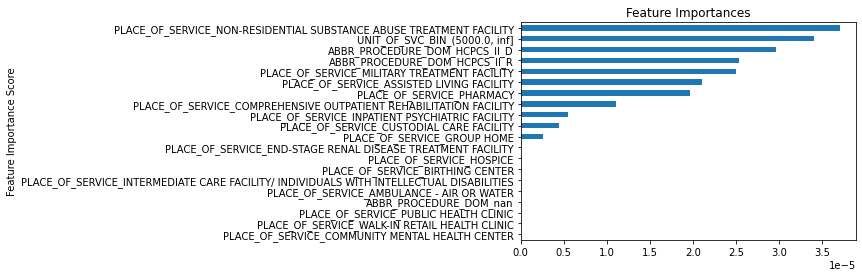

In [49]:
feat_imp = pd.Series(random_forest.feature_importances_, index=train_cols)
feat_imp.sort_values(ascending=True).iloc[:20].plot(kind='barh', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [50]:
# from sklearn.metrics import classification_report

# print(classification_report(y_test_up, forest_predict_up, target_names=['MBC_PATIENT','NON-MBC_PATIENT']))

In [51]:
# from sklearn.metrics import confusion_matrix
# forest_CM = confusion_matrix(y_test_up, forest_predict_up)

In [52]:
# print(TN,FN,TP,FP)

In [53]:
# print("Accuracy", (forest_CM[1][1]+forest_CM[0][0])/(forest_CM[1][1]+forest_CM[0][0]+forest_CM[0][1]+forest_CM[1][0]))
# print("Sensitivity", forest_CM[1][1]/(forest_CM[1][1]+forest_CM[1][0]))
# print("Specificity", forest_CM[0][0]/(forest_CM[0][0]+forest_CM[0][1]))

In [54]:
# print("Accuracy", (TP+TN)/(TP+TN+FP+FN))

In [55]:
#Logistic Regression

LR = LogisticRegression()
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train_down[train_cols], y_train_down[target], scoring=scoring, cv=5)
sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()
LR.fit(X_train_down[train_cols],y_train_down[target])
LR_predict_down = LR.predict(X_test_down[train_cols])
LR_CM = confusion_matrix(y_test_down, LR_predict_down)
LR_specificity = LR_CM[0][0]/(LR_CM[0][0]+LR_CM[0][1])


#Decision Tree

decision_tree = DecisionTreeClassifier()
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X_train_down[train_cols], y_train_down[target], scoring=scoring, cv=5)
sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()
decision_tree.fit(X_train_down[train_cols],y_train_down[target])
dtree_predict_down = decision_tree.predict(X_test_down[train_cols])
dtree_CM = confusion_matrix(y_test_down, dtree_predict_down)
dtree_specificity = dtree_CM[0][0]/(dtree_CM[0][0]+dtree_CM[0][1])


#Support Vector Machine

#SVM = SVC(probability = True)
#scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
#scores = cross_validate(SVM, X_train_down[train_cols], y_train_down[target], scoring=scoring, cv=5)
#sorted(scores.keys())
#SVM_fit_time = scores['fit_time'].mean()
#SVM_score_time = scores['score_time'].mean()
#SVM_accuracy = scores['test_accuracy'].mean()
#SVM_precision = scores['test_precision_macro'].mean()
#SVM_recall = scores['test_recall_macro'].mean()
#SVM_f1 = scores['test_f1_weighted'].mean()
#SVM_roc = scores['test_roc_auc'].mean()
#SVM.fit(X_train_down[train_cols],y_train_down[target])
#SVM_predict_down = SVM.predict(X_test_down[train_cols])
#SVM_CM = confusion_matrix(y_test_down, SVM_predict_down)
#SVM_specificity = SVM_CM[0][0]/(SVM_CM[0][0]+SVM_CM[0][1])

#Linear Discriminant Analysis

LDA = LinearDiscriminantAnalysis()
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, X_train_down[train_cols], y_train_down[target], scoring=scoring, cv=5)
sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()
LDA.fit(X_train_down[train_cols],y_train_down[target])
LDA_predict_down = LDA.predict(X_test_down[train_cols])
LDA_CM = confusion_matrix(y_test_down, LDA_predict_down)
LDA_specificity = LDA_CM[0][0]/(LDA_CM[0][0]+LDA_CM[0][1])

#Quadratic Discriminant Analysis

QDA = QuadraticDiscriminantAnalysis()
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, X_train_down[train_cols], y_train_down[target], scoring=scoring, cv=5)
sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()
QDA.fit(X_train_down[train_cols],y_train_down[target])
QDA_predict_down = QDA.predict(X_test_down[train_cols])
QDA_CM = confusion_matrix(y_test_down, QDA_predict_down)
QDA_specificity = QDA_CM[0][0]/(QDA_CM[0][0]+QDA_CM[0][1])

#Random Forest Classifier

random_forest = RandomForestClassifier()
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train_down[train_cols], y_train_down[target], scoring=scoring, cv=5)
sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()
random_forest.fit(X_train_down[train_cols],y_train_down[target])
forest_predict_down = random_forest.predict(X_test_down[train_cols])
forest_CM = confusion_matrix(y_test_down, forest_predict_down)
forest_specificity = forest_CM[0][0]/(forest_CM[0][0]+forest_CM[0][1])

#K-Nearest Neighbors

KNN = KNeighborsClassifier()
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train_down[train_cols], y_train_down[target], scoring=scoring, cv=5)
sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()
KNN.fit(X_train_down[train_cols],y_train_down[target])
KNN_predict_down = KNN.predict(X_test_down[train_cols])
KNN_CM = confusion_matrix(y_test_down, KNN_predict_down)
KNN_specificity = KNN_CM[0][0]/(KNN_CM[0][0]+KNN_CM[0][1])

#Naive Bayes

scoring
bayes = GaussianNB()
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, X_train_down[train_cols], y_train_down[target], scoring=scoring, cv=5)
sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()
bayes.fit(X_train_down[train_cols],y_train_down[target])
bayes_predict_down = bayes.predict(X_test_down[train_cols])
bayes_CM = confusion_matrix(y_test_down, bayes_predict_down)
bayes_specificity = bayes_CM[0][0]/(bayes_CM[0][0]+bayes_CM[0][1])


## Comparison

models_tree = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall/Sensitivity' : [LR_recall, dtree_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'Specificity' : [LR_specificity, dtree_specificity, LDA_specificity, QDA_specificity, forest_specificity, KNN_specificity, bayes_specificity],
    'F1_score'    : [LR_f1, dtree_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall/Sensitivity', 'Specificity', 'F1_score', 'AUC_ROC'])
models_tree.sort_values(by='Accuracy', ascending=False)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


,Model,Fitting time,Scoring time,Accuracy,Precision,Recall/Sensitivity,Specificity,F1_score,AUC_ROC
4,Random Forest,2.534895,0.180915,0.784401,0.789702,0.784198,0.866044,0.783372,0.864782
0,Logistic Regression,0.318203,0.071282,0.760216,0.761218,0.760304,0.746417,0.760007,0.802929
2,Linear Discriminant Analysis,0.269809,0.070523,0.743029,0.748691,0.743249,0.684735,0.741614,0.819456
5,K-Nearest Neighbors,0.245958,1.892235,0.736649,0.736929,0.736605,0.770717,0.736560,0.798520
1,Decision Tree,0.441314,0.068435,0.708860,0.708929,0.708840,0.724611,0.708830,0.708498
6,Bayes,0.129383,0.074466,0.583513,0.638481,0.584442,0.276636,0.537686,0.671822
3,Quadratic Discriminant Analysis,0.175743,0.080036,0.568384,0.635512,0.569421,0.127726,0.506175,0.734407


Text(0, 0.5, 'Feature Importance Score')

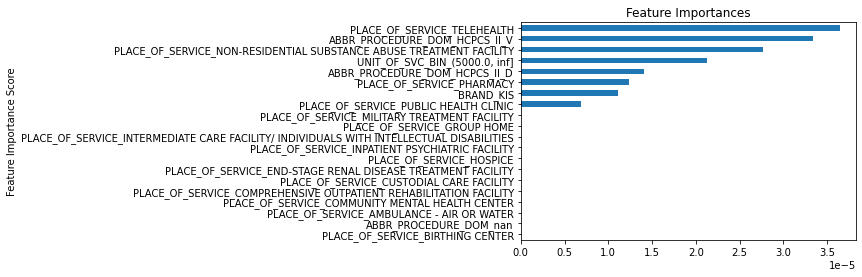

In [56]:
feat_imp = pd.Series(random_forest.feature_importances_, index=train_cols)
feat_imp.sort_values(ascending=True).iloc[:20].plot(kind='barh', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [57]:
#Logistic Regression

LR = LogisticRegression()
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train[train_cols], y_train[target], scoring=scoring, cv=5)
sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()
LR.fit(X_train[train_cols],y_train[target])
LR_predict = LR.predict(X_test[train_cols])
LR_CM = confusion_matrix(y_test, LR_predict)
LR_specificity = LR_CM[0][0]/(LR_CM[0][0]+LR_CM[0][1])


#Decision Tree

decision_tree = DecisionTreeClassifier()
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X_train[train_cols], y_train[target], scoring=scoring, cv=5)
sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()
decision_tree.fit(X_train[train_cols],y_train[target])
dtree_predict = decision_tree.predict(X_test[train_cols])
dtree_CM = confusion_matrix(y_test, dtree_predict)
dtree_specificity = dtree_CM[0][0]/(dtree_CM[0][0]+dtree_CM[0][1])


#Support Vector Machine

#SVM = SVC(probability = True)
#scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
#scores = cross_validate(SVM, X_train[train_cols], y_train[target], scoring=scoring, cv=5)
#sorted(scores.keys())
#SVM_fit_time = scores['fit_time'].mean()
#SVM_score_time = scores['score_time'].mean()
#SVM_accuracy = scores['test_accuracy'].mean()
#SVM_precision = scores['test_precision_macro'].mean()
#SVM_recall = scores['test_recall_macro'].mean()
#SVM_f1 = scores['test_f1_weighted'].mean()
#SVM_roc = scores['test_roc_auc'].mean()
#SVM.fit(X_train[train_cols],y_train[target])
#SVM_predict = SVM.predict(X_test[train_cols])
#SVM_CM = confusion_matrix(y_test, SVM_predict)
#SVM_specificity = SVM_CM[0][0]/(SVM_CM[0][0]+SVM_CM[0][1])

#Linear Discriminant Analysis

LDA = LinearDiscriminantAnalysis()
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, X_train[train_cols], y_train[target], scoring=scoring, cv=5)
sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()
LDA.fit(X_train[train_cols],y_train[target])
LDA_predict = LDA.predict(X_test[train_cols])
LDA_CM = confusion_matrix(y_test, LDA_predict)
LDA_specificity = LDA_CM[0][0]/(LDA_CM[0][0]+LDA_CM[0][1])

#Quadratic Discriminant Analysis

QDA = QuadraticDiscriminantAnalysis()
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, X_train[train_cols], y_train[target], scoring=scoring, cv=5)
sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()
QDA.fit(X_train[train_cols],y_train[target])
QDA_predict = QDA.predict(X_test[train_cols])
QDA_CM = confusion_matrix(y_test, QDA_predict)
QDA_specificity = QDA_CM[0][0]/(QDA_CM[0][0]+QDA_CM[0][1])

#Random Forest Classifier

random_forest = RandomForestClassifier()
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train[train_cols], y_train[target], scoring=scoring, cv=5)
sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()
random_forest.fit(X_train[train_cols],y_train[target])
forest_predict = random_forest.predict(X_test[train_cols])
forest_CM = confusion_matrix(y_test, forest_predict)
forest_specificity = forest_CM[0][0]/(forest_CM[0][0]+forest_CM[0][1])

#K-Nearest Neighbors

KNN = KNeighborsClassifier()
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train[train_cols], y_train[target], scoring=scoring, cv=5)
sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()
KNN.fit(X_train[train_cols],y_train[target])
KNN_predict = KNN.predict(X_test[train_cols])
KNN_CM = confusion_matrix(y_test, KNN_predict)
KNN_specificity = KNN_CM[0][0]/(KNN_CM[0][0]+KNN_CM[0][1])

#Naive Bayes

scoring
bayes = GaussianNB()
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, X_train[train_cols], y_train[target], scoring=scoring, cv=5)
sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()
bayes.fit(X_train[train_cols],y_train[target])
bayes_predict = bayes.predict(X_test[train_cols])
bayes_CM = confusion_matrix(y_test, bayes_predict)
bayes_specificity = bayes_CM[0][0]/(bayes_CM[0][0]+bayes_CM[0][1])


## Comparison

models_tree = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall/Sensitivity'      : [LR_recall, dtree_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'Specifivity' : [LR_specificity, dtree_specificity, LDA_specificity, QDA_specificity, forest_specificity, KNN_specificity, bayes_specificity],
    'F1_score'    : [LR_f1, dtree_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall/Sensitivity', 'Specifivity', 'F1_score', 'AUC_ROC'])
models_tree.sort_values(by='Accuracy', ascending=False)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


,Model,Fitting time,Scoring time,Accuracy,Precision,Recall/Sensitivity,Specifivity,F1_score,AUC_ROC
4,Random Forest,4.184694,0.269532,0.798533,0.805454,0.783448,0.893245,0.794789,0.869559
0,Logistic Regression,0.481942,0.106870,0.773267,0.769195,0.767746,0.785089,0.772959,0.817505
2,Linear Discriminant Analysis,0.391153,0.101760,0.755800,0.752249,0.755578,0.750438,0.756598,0.817207
5,K-Nearest Neighbors,0.383746,4.236913,0.748600,0.744599,0.740004,0.812041,0.747406,0.801068
1,Decision Tree,0.755648,0.098593,0.722733,0.717469,0.716328,0.740637,0.722355,0.716215
6,Bayes,0.217360,0.108634,0.529400,0.629916,0.575485,0.239412,0.477206,0.635645
3,Quadratic Discriminant Analysis,0.283989,0.118594,0.464800,0.613086,0.525354,0.145957,0.346319,0.732471


Text(0, 0.5, 'Feature Importance Score')

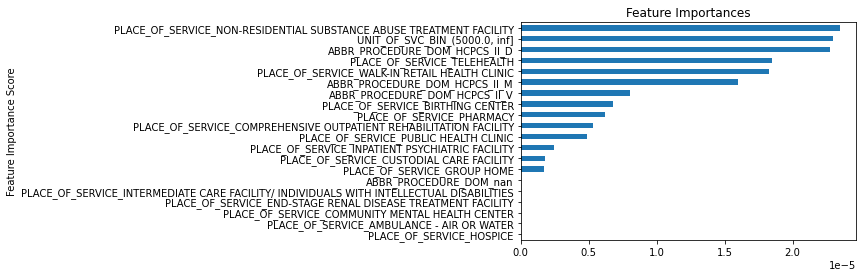

In [58]:
feat_imp = pd.Series(random_forest.feature_importances_, index=train_cols)
feat_imp.sort_values(ascending=True).iloc[:20].plot(kind='barh', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [59]:
# make_submission(LR_predict_dummy_down,"LR_predict_dummy_down")
# make_submission(dtree_predict_dummy_down,"dtree_predict_dummy_down")
# make_submission(LDA_predict_dummy_down,"LDA_predict_dummy_down")
# make_submission(QDA_predict_dummy_down,"QDA_predict_dummy_down")
# make_submission(forest_predict_dummy_down,"forest_predict_dummy_down")
# make_submission(KNN_predict_dummy_down,"KNN_predict_dummy_down")
# make_submission(bayes_predict_dummy_down,"bayes_predict_dummy_down")

In [60]:
models_tree = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall/Sensitivity'      : [LR_recall, dtree_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'Specifivity' : [LR_specificity, dtree_specificity, LDA_specificity, QDA_specificity, forest_specificity, KNN_specificity, bayes_specificity],
    'F1_score'    : [LR_f1, dtree_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall/Sensitivity', 'Specifivity', 'F1_score', 'AUC_ROC'])
models_tree.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall/Sensitivity,Specifivity,F1_score,AUC_ROC
4,Random Forest,4.184694,0.269532,0.798533,0.805454,0.783448,0.893245,0.794789,0.869559
0,Logistic Regression,0.481942,0.106870,0.773267,0.769195,0.767746,0.785089,0.772959,0.817505
2,Linear Discriminant Analysis,0.391153,0.101760,0.755800,0.752249,0.755578,0.750438,0.756598,0.817207
5,K-Nearest Neighbors,0.383746,4.236913,0.748600,0.744599,0.740004,0.812041,0.747406,0.801068
1,Decision Tree,0.755648,0.098593,0.722733,0.717469,0.716328,0.740637,0.722355,0.716215
6,Bayes,0.217360,0.108634,0.529400,0.629916,0.575485,0.239412,0.477206,0.635645
3,Quadratic Discriminant Analysis,0.283989,0.118594,0.464800,0.613086,0.525354,0.145957,0.346319,0.732471
